# The questions about this dataset:

1.Does higher budget mean higher popularity ? Is there a coefficent relationship ?

2.Will the runtime affect the vote count and popularity?

3.Higher popularity means higher profits ?

4.What Features are Associate with Top 10 Revenue Movies ?

5.Which genres are most popular from year to year?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns       
import numpy as np
%matplotlib inline 

# Data Wrangling:

Learn about data types and data structures. I did remove duplicates and unnecessary columns such as imdb_id, homepage, and so on.

When dealing with missing data. I fill the null with the text "missing" for any missing data with data type object. I fill 0 with np.NAN for budget, datatype integer.

In [2]:
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape 

(10866, 21)

In [4]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [8]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [9]:
df.drop(['id','imdb_id', 'homepage','overview'],axis=1,inplace=True)

In [10]:
df['cast'].fillna('missing',inplace=True )
df['director'].fillna('missing',inplace=True)
df['tagline'].fillna('missing',inplace=True)
df['keywords'].fillna('missing',inplace=True)
df['genres'].fillna('missing',inplace=True)
df['production_companies'].fillna('missing',inplace=True) 
df['budget'] = df['budget'].replace(0, np.NAN) 

In [11]:
df.isnull().sum()

popularity                 0
budget                  5696
revenue                    0
original_title             0
cast                       0
director                   0
tagline                    0
keywords                   0
runtime                    0
genres                     0
production_companies       0
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [12]:
df.duplicated().sum()

1

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

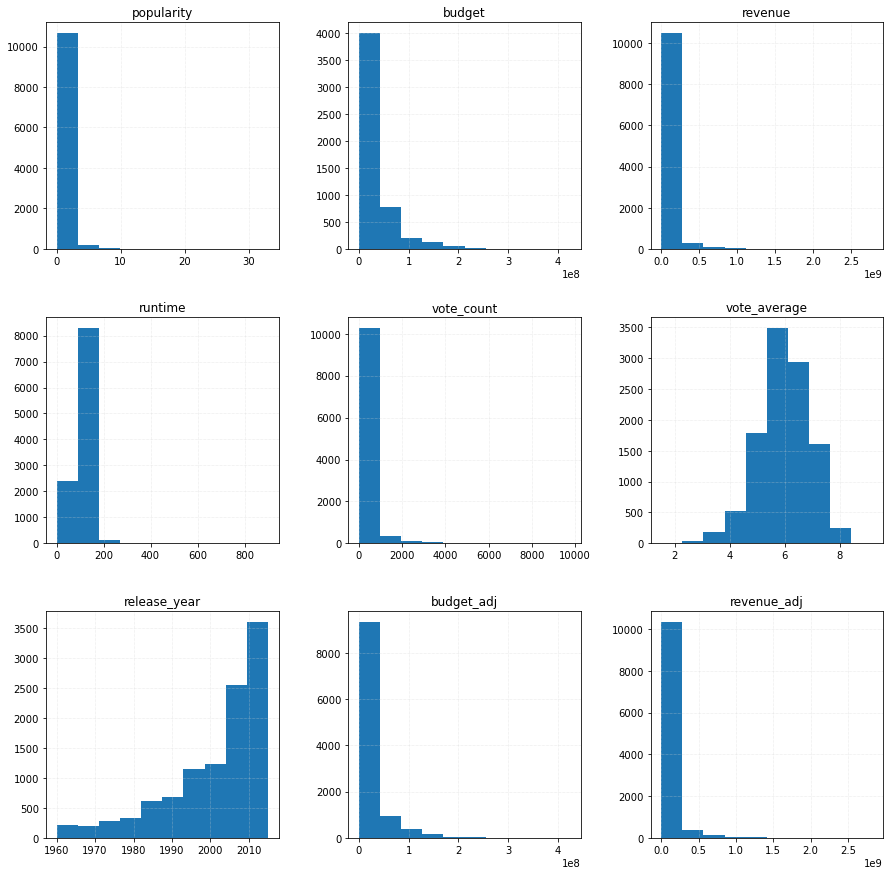

In [15]:
# Create the histogram plot
axes = df.hist(figsize=(15, 15), grid=False)  # Set grid=False initially to avoid duplicate grids

# Loop through each subplot and set grid properties
for ax in axes.flatten():
    ax.grid(True, linestyle=':', linewidth=0.5, color='lightgray')

# Exploration with Visuals and Conclusions

Question 1. Does higher budget mean higher popularity ? Is there a coefficent relationship ?

(-2.999935, 37.985763)

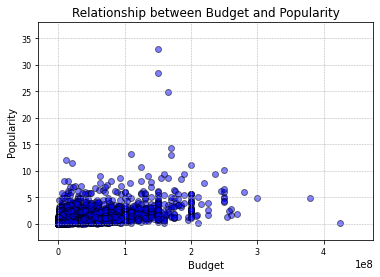

In [16]:
x = df['budget']
y = df['popularity']

plt.scatter(x, y, marker='o', color='blue', alpha=0.5, edgecolor='black', linewidth=1.0)
plt.title('Relationship between Budget and Popularity', fontsize=12)
plt.xlabel('Budget', fontsize=10)
plt.ylabel('Popularity', fontsize=10)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.xlim(min(x) - 30000000, max(x) + 50000000)
plt.ylim(min(y) - 3, max(y) + 5)

The preceding plot does not show a particularly significant relationship between the budget and the popularity. Let's look at the facts in a different light: divide the budget into two categories depending on the median value.

In [17]:
m = df['budget'].median()
low_budg =  df.query('budget < {}'.format(m))
high_budg =  df.query('budget >= {}'.format(m))

In [18]:
mean_popularity_of_low_budget = low_budg['popularity'].mean()
mean_popularity_of_high_budget = high_budg['popularity'].mean()

Text(0, 0.5, 'Average Popularity')

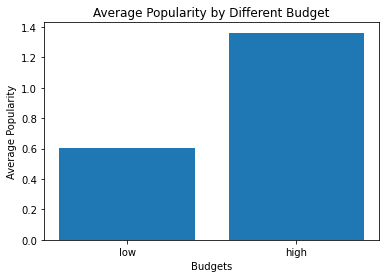

In [19]:
locations = [1,2]
heights = [mean_popularity_of_low_budget, mean_popularity_of_high_budget]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average Popularity by Different Budget')
plt.xlabel('Budgets')
plt.ylabel('Average Popularity')

In [20]:
increase_percentage = (mean_popularity_of_high_budget - mean_popularity_of_low_budget) / mean_popularity_of_high_budget * 100
increase_percentage

55.50933772947093

Conclusion for Q1: This bar plot makes it very evident that movies with higher budgets are more likely to be high popularity. We may draw the conclusion that movies with larger budgets are more popular than those with lower budgets by more than 50%.

Q2: What length will receive the highest popularity?

In [21]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
10861    False
10862    False
10863    False
10864    False
10865    False
Length: 10865, dtype: bool

In [22]:
# here I will create 3 groups with query().  <60 min: short   , 60 min <=  <= - 120 min: medium ,  >120 min: long 
short =  df.query('runtime < {}'.format(100))
medium =  df.query('runtime < {}'.format(200))
long = df.query('runtime > {}'.format(200))

In [23]:
# check mean popularity of different movie lengths 
mean_popularity_of_short = short['popularity'].mean()
mean_popularity_of_medium = medium['popularity'].mean()
mean_popularity_of_long = long['popularity'].mean()


Text(0, 0.5, 'Average Popularity')

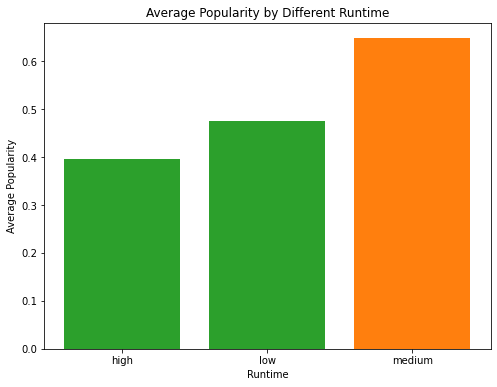

In [24]:
locations = [2,3,1]
heights = [mean_popularity_of_short, mean_popularity_of_medium, mean_popularity_of_long]
labels=['low','medium','high']
plt.figure(figsize=(8, 6))  # Increase figure size for better visibility
plt.bar(locations, heights, tick_label=labels, color=['#2ca02c', '#ff7f0e', '#2ca02c'])
plt.title('Average Popularity by Different Runtime')
plt.xlabel('Runtime')
plt.ylabel('Average Popularity')

The movies should be neither too long nor too short. Medium length is preferable for higher popularity. However, it is difficult to determine the ideal duration of runtime from the above bar chart. A scatter plot could be a better option.

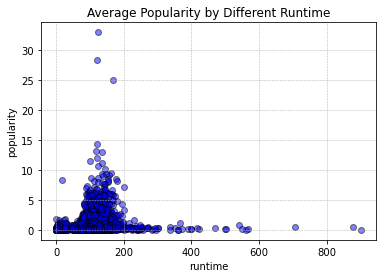

In [80]:
# plot the relation between runtime and popularity 
x = df['runtime']
y = df['popularity'] 

plt.scatter(x, y, marker='o', color='blue', alpha=0.5, edgecolor='black', linewidth=1.0)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.title('Average Popularity by Different Runtime',fontsize=12)
plt.xlabel('runtime',fontsize=10)
plt.ylabel('popularity',fontsize=10);

Conclusion Q2: We cannot simply claim that the longer the run time, the more popular the movies are.
The movies will be more popular if they are under 200 minutes long. It is difficult for movies to become popular once they exceed 200 minutes in length.

Q3 : Higher popularity means higher profits ?

In [29]:
# Calculate median popularity
m_popularity = df['popularity'].median()

# Create lower_popularity and higher_popularity DataFrames based on median popularity
lower_popularity = df.query('popularity < {}'.format(m_popularity))
higher_popularity = df.query('popularity >= {}'.format(m_popularity))

# Calculate profit for each row and create a new 'profit' column in the df DataFrame
df['profit'] = df['revenue'] - df['budget']

# Calculate average net profit for low_popularity and high_popularity
mean_profit_of_low_popularity = lower_popularity['profit'].mean()
mean_profit_of_high_popularity = higher_popularity['profit'].mean()

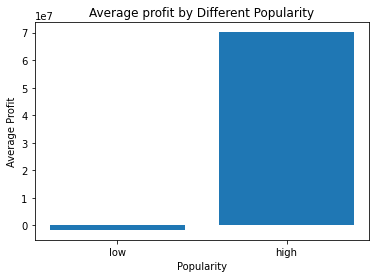

In [31]:
# create a bar chart with the values we get above 
locations = [1,2]
heights = [mean_profit_of_low_popularity, mean_profit_of_high_popularity]
labels=['low','high']
plt.bar(locations, heights, tick_label = labels)
plt.title('Average profit by Different Popularity')
plt.xlabel('Popularity')
plt.ylabel('Average Profit');

Conclusion for Q3:
As we can see above, higher popularity does make much higher average profits.

Q4: What Features are Associate with Top 10 Revenue Movies ?

array([[<AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'revenue'}>],
       [<AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'budget_adj'}>,
        <AxesSubplot:title={'center':'revenue_adj'}>],
       [<AxesSubplot:title={'center':'profit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

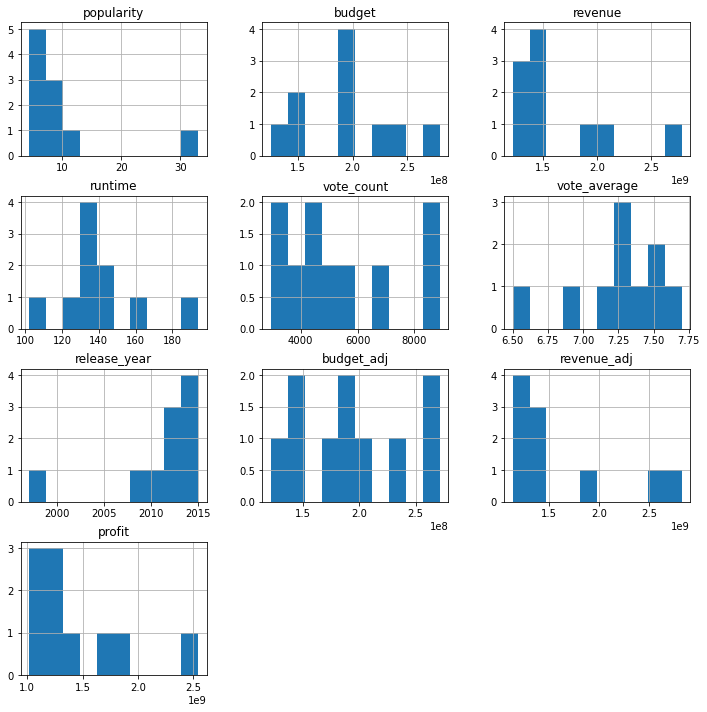

In [32]:
top10_revenue = df.nlargest(10,'revenue')
top10_revenue.hist(figsize=(12,12))

Conclusion for Q4:

There are some characteristics we can conclude from the top 10 movies. Runtime ranges from 100 mins to 200 mins. The released year are between 1995 to 2015.

Q5: Which genres are most popular from year to year?

In [33]:
#The following function can give all the counts for per category 
def extract_data(column_name):
    data = df[column_name].str.cat(sep = '|') # put all the genres into a long string  
    # Create pandas series and store the values separately
    data = pd.Series(data.split('|'))   # split the genres by |
    # Display value count in descending order
    count = data.value_counts(ascending = False) # count the occurrence of each genres 
    return count

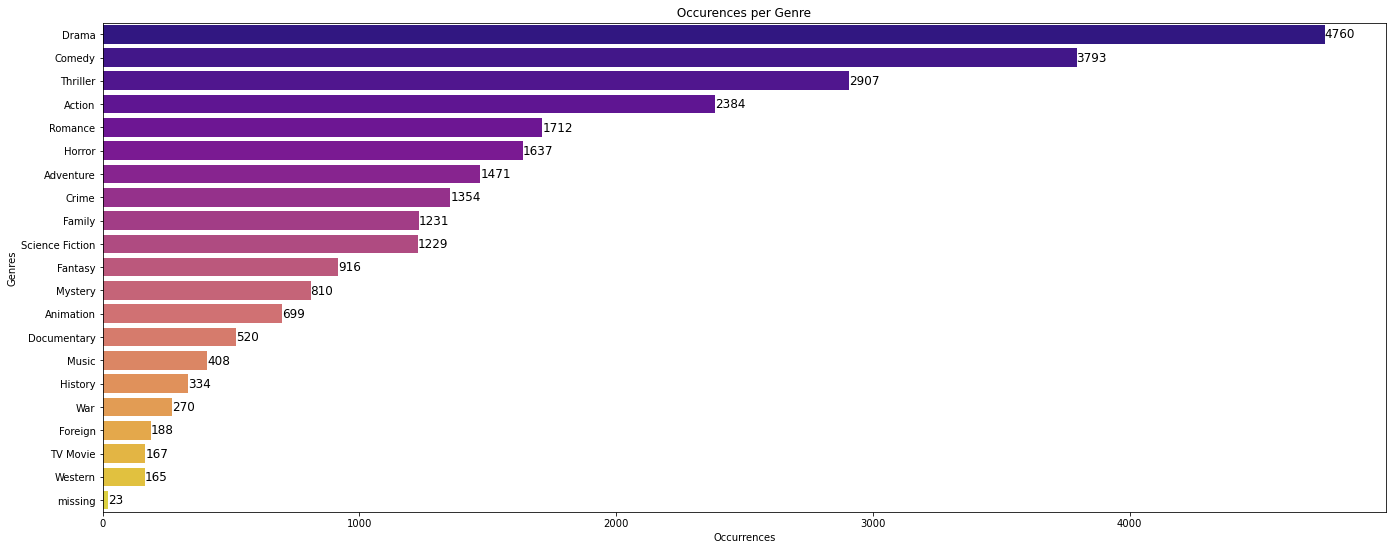

In [79]:
# use the function created above to split genres and count the occurrence of each one
genre_count = extract_data('genres')

#create a separate dataframe to plot
df_genre_counts = pd.DataFrame({'genres': genre_count.index, 'count': genre_count.values }) 
#df_genre_counts

f, ax = plt.subplots(figsize=(23, 9))
# use the dataframe just created as the input data 
sns.barplot(x = 'count', y = 'genres', data=df_genre_counts, palette='plasma') # how to get the data is the key 
ax.set_title(' Occurences per Genre ')
ax.set_xlabel('Occurrences')
ax.set_ylabel('Genres');
for index, value in enumerate(df_genre_counts['count']):
    ax.text(value, index, str(value), ha='left', va='center', fontsize=12)

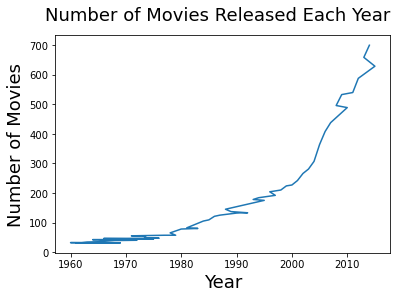

In [48]:
movie_count = df['release_year'].value_counts()
# movie_count.plot(xlabel='year',ylabel='number of movies',title='Number of Movies Released Each Year')
fig = plt.figure()
plt.plot(movie_count)
fig.suptitle('Number of Movies Released Each Year',fontsize=18)
plt.xlabel('ear',fontsize=18)
plt.ylabel('Number of Movies',fontsize=18);

Throught above two plots, we can see The top 5 genres are Drama, Comedy, Action, Horror and Adventrue The number of movies increased along the time.

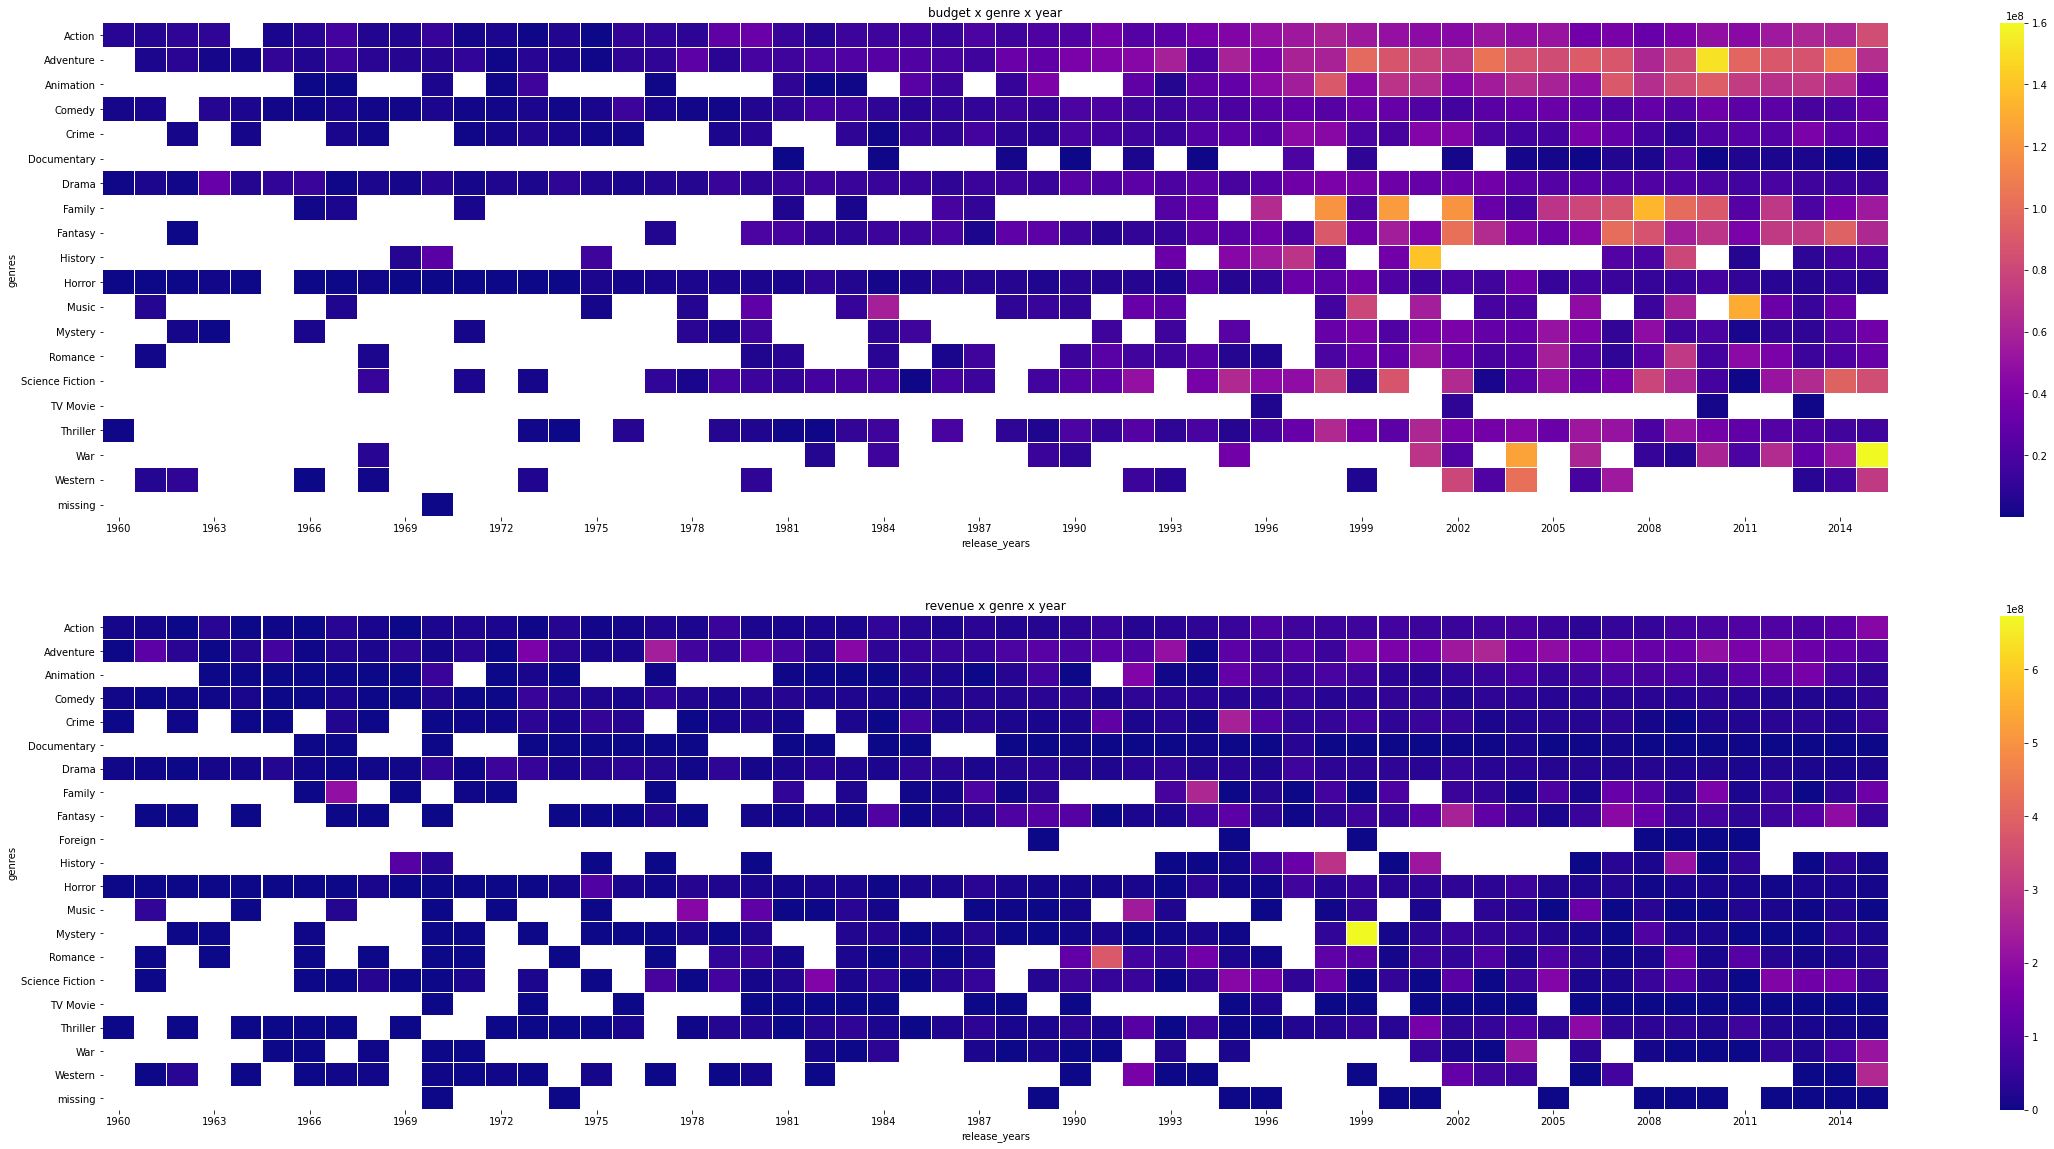

In [78]:
# The following is a really comprehensive plot. It shows the revenue and budget for each genre type per year
# genres are so specific, I will just take the first genre for each movie instead of the genre combination
df['genre'] =  df['genres'].apply(lambda x: x.split('|')[0])

# plot all the genre types for each year with the budget and revenue
genre_year = df.groupby(['genre', 'release_year']).mean().sort_index()
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)
df_gyBudget = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='budget', aggfunc=np.mean)


df_gyGross = genre_year.pivot_table(index=['genre'], columns=['release_year'], values='revenue', aggfunc=np.mean)
f, [axA, axB] = plt.subplots(figsize=(40, 20), nrows=2)
cmap = sns.cubehelix_palette(start=1.5, rot=1.5, as_cmap=True)
sns.heatmap(df_gyBudget, xticklabels=3, cmap='plasma', linewidths=0.05, ax=axA)
sns.heatmap(df_gyGross, xticklabels=3, cmap='plasma', linewidths=0.05, ax=axB)
axA.set_title('budget x genre x year')
axA.set_xlabel('release_years')
axA.set_ylabel('genres')


axB.set_title('revenue x genre x year')
axB.set_xlabel('release_years')
axB.set_ylabel('genres')
plt.show()

Conclusion for Q5: As time passes, we have a greater selection of movies and genres to pick from. From 1984 to 2014, there have been an increasing number of high-budget, high-revenue films.

# Conclusion:

We may draw the following conclusions from the analysis I performed above:

1.The number and variety of film are increasing.As an audience, we have more options to pick from.

2.We cannot say that a large budget assures popularity. However, larger-budget films have a greater average popularity.

3.To make a more popular film, the length should be roughly 150 minutes; drama, comedy, and action are all preferred genres.

# Limitations:

1.These are the elements that contribute to a film's popularity and success. But we must also recognize the limitations. There are several missing values and many erroneous zeros, which may have an impact on the study.

2.It's hard for us to know how the vote_counts and popularity are measured.

3.Currency is not indicated for foreign films. Inflationary trends throughout time should also be considered.